In [271]:
import requests
import pprint
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from captioning.captioning_config import Config
pp = pprint.PrettyPrinter(indent=4, depth=6)
config = Config()

# Formulate Query

In [272]:
model_name = "flickr_attn"

In [273]:
queries = ["Two kids playing.",
           "A man is surfing,",
           "A black car on the road", 
           "Two dogs running on a beach.", 
           "Crowd of people on the road.", 
           "Two football players are tackling a football player on the field ."
          ]


In [274]:
def show_img(query):
    fig=plt.figure(figsize=(10, 10))
    fig.suptitle(f"Top 5 images for query '{query}'", fontsize=16)

    columns = 3
    rows = 2
    for i in range(1, len(image_ids)+1):
        img = plt.imread(image_ids[i-1]) 
        fig.add_subplot(rows, columns, i)
        plt.axis("off")
        plt.imshow(img)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

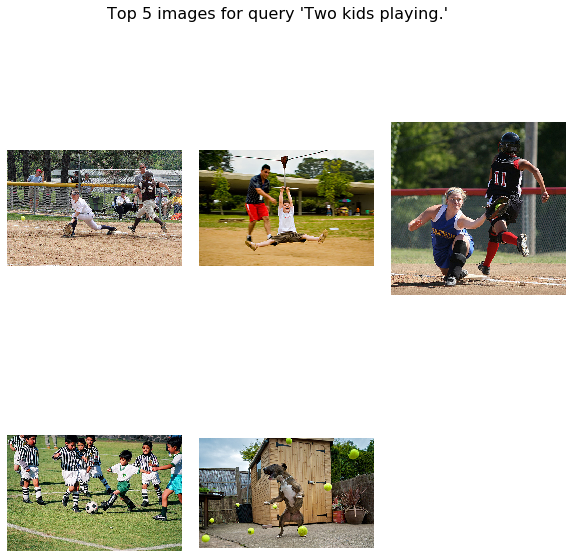

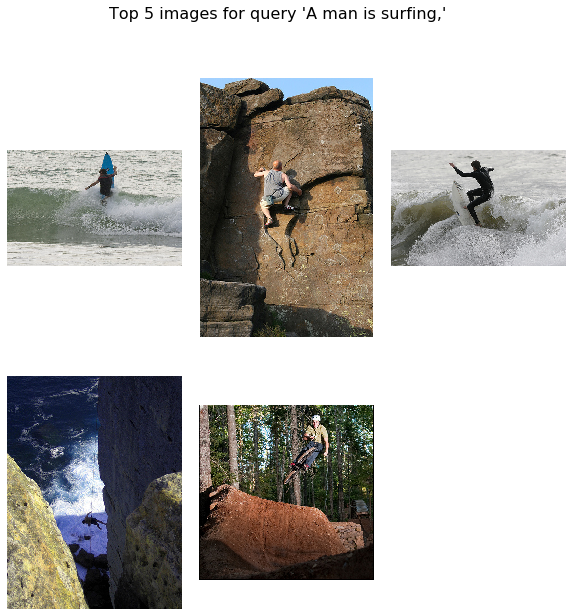

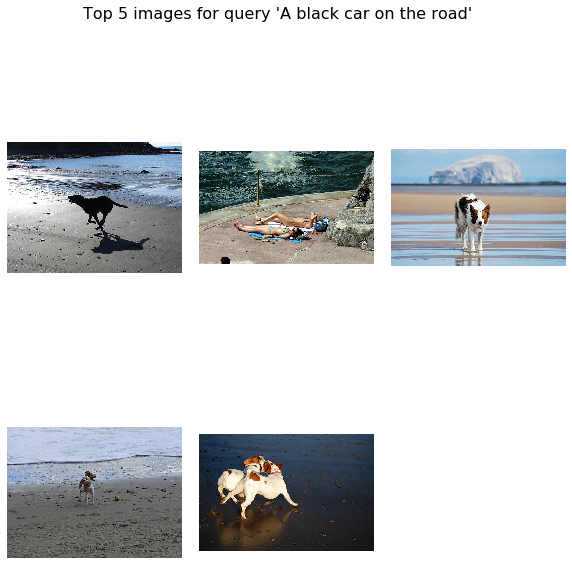

In [ ]:
for query in queries:
    url = f"http://0.0.0.0:5000/search/{model_name}/{query.replace(' ', '%20')}"
    response = requests.get(url)
    json_resp = json.loads(response.text)
    image_ids = [os.path.join(config.images_dir,im.strip("\"\'\[\]")) for im in json_resp["image_ids"].split(', ')]
    # print(image_ids)
    show_img(query)

In [ ]:
model_name = "flickr"
for query in queries:
    url = f"http://0.0.0.0:5000/search/{model_name}/{query.replace(' ', '%20')}"
    response = requests.get(url)
    json_resp = json.loads(response.text)
    image_ids = [os.path.join(config.images_dir,im.strip("\"\'\[\]")) for im in json_resp["image_ids"].split(', ')]
    # print(image_ids)
    show_img(query)